In [ ]:
# mount Google Drive
from google.colab import drive
import os
drive.mount('/content/drive')

# change the directory below to your drive's data folder
os.chdir('/content/drive/My Drive/Projects/1_Verification_Sourcecode_Siamese/data_gen')

In [ ]:
# download and extract data (already done, please skip)
'''
!apt install p7zip-full # bullet-proof
!wget https://raw.githubusercontent.com/Jur1cek/gcj-dataset/master/gcj2008.csv.zip && 7z x gcj2008.csv.zip && rm gcj2008.csv.zip
!wget https://raw.githubusercontent.com/Jur1cek/gcj-dataset/master/gcj2009.csv.zip && 7z x gcj2009.csv.zip && rm gcj2009.csv.zip
!wget https://raw.githubusercontent.com/Jur1cek/gcj-dataset/master/gcj2010.csv.zip && 7z x gcj2010.csv.zip && rm gcj2010.csv.zip
!wget https://raw.githubusercontent.com/Jur1cek/gcj-dataset/master/gcj2011.csv.zip && 7z x gcj2011.csv.zip && rm gcj2011.csv.zip
!wget https://raw.githubusercontent.com/Jur1cek/gcj-dataset/master/gcj2012.csv.zip && 7z x gcj2012.csv.zip && rm gcj2012.csv.zip
!wget https://raw.githubusercontent.com/Jur1cek/gcj-dataset/master/gcj2013.csv.zip && 7z x gcj2013.csv.zip && rm gcj2013.csv.zip
!wget https://raw.githubusercontent.com/Jur1cek/gcj-dataset/master/gcj2014.csv.zip && 7z x gcj2014.csv.zip && rm gcj2014.csv.zip
!wget https://raw.githubusercontent.com/Jur1cek/gcj-dataset/master/gcj2015.csv.zip && 7z x gcj2015.csv.zip && rm gcj2015.csv.zip
!wget https://raw.githubusercontent.com/Jur1cek/gcj-dataset/master/gcj2016.csv.zip && 7z x gcj2016.csv.zip && rm gcj2016.csv.zip
!wget https://raw.githubusercontent.com/Jur1cek/gcj-dataset/master/gcj2017.csv.zip && 7z x gcj2017.csv.zip && rm gcj2017.csv.zip
'''

sample_data
/content


In [ ]:
# load csv, examine
import pandas as pd

ds = []
for yr in range(2008, 2018):
  ds.append(pd.read_csv('gcj{}.csv'.format(yr)))
ds = pd.concat(ds, ignore_index=True)

# add file type as attribute:
ds['file_type'] = ds.apply(lambda row: os.path.splitext(row['file'])[1] , axis=1)

print(ds.shape[0])
print(ds.columns.values)
print(ds.loc[0])

In [ ]:
# remove duplicated data
ds_dup = ds[ds.duplicated(['username', 'flines'])]
print(ds_dup.shape[0])

ds = ds[~ds.duplicated(['username', 'flines'])]
print(ds.shape[0])

305841
942665


In [ ]:
# Language per author
author_types = ds[['username','file_type']].groupby('username')
author_ntypes_n = pd.DataFrame(author_types['file_type'].nunique()).reset_index()
author_ntypes_n.columns = ['username', 'ntypes']

print("Language types per author, total author num:"+str(author_ntypes_n.shape[0]))
author_ntypes_n.groupby(["ntypes"]).agg({"username": "count"}).head(10)

Language types per author, total author num:98963


,username
ntypes,
1,77154
2,17016
3,3604
4,806
5,215
6,52
7,35
8,14
9,6


In [ ]:
# File per author
print(ds.shape[0])
print('File per author')
authors = ds[['username', 'full_path']].groupby('username').agg(['count'])
authors.describe()

942665
File per author


,full_path
,count
count,98963.000000
mean,9.525075
std,13.900452
min,1.000000
25%,3.000000
50%,5.000000
75%,10.000000
max,278.000000


Cummulative distribution function. Text annotation (percentage/number of the authors having more than that number of files)


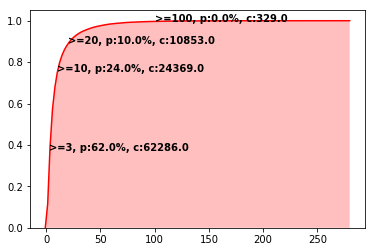

In [ ]:
# File per author (cdf)
import statsmodels
import seaborn as sns

vals = authors.iloc[:,0].tolist()
p1=sns.kdeplot(vals, cumulative=True, shade=True, color="r")

from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(vals)

def annotate(val):
    percentage = ecdf(val)
    right = (1-percentage)*10000//100
    p1.text(val, percentage, ">={}, p:{}%, c:{}".format(val, right, (1-percentage)*len(vals)//1), horizontalalignment='left', size='medium', color='black', weight='semibold')

print('Cummulative distribution function. Text annotation (percentage/number of the authors having more than that number of files)')
annotate(100)
annotate(20)
annotate(10)
annotate(3)

In [ ]:
print('Files per year')
ds.groupby("year").agg({"full_path": pd.Series.nunique})

Files per year


,full_path
year,
2008,37822
2009,47500
2010,55487
2011,78784
2012,80787
2013,110626
2014,125058
2015,110315
2016,164088


In [ ]:
print('Authors per year')
ds.groupby("year").agg({"username": pd.Series.nunique})

Authors per year


,username
year,
2008,6923
2009,8151
2010,10033
2011,11678
2012,17581
2013,20998
2014,25174
2015,23084
2016,26955


In [ ]:
print('Authors per file type')
ds.groupby("file_type").agg({"username": pd.Series.nunique}).sort_values(['username'], ascending=False).head(10)

Authors per file type


,username
file_type,
.cpp,45356
.java,26737
.py,21842
.c,8122
.cs,5157
.txt,3079
.rb,2200
.cc,1854
.php,1519


In [ ]:
# File per author (cdf)
import statsmodels
vals = python_auth.iloc[:,0].tolist()
p1=sns.kdeplot(vals, cumulative=True, shade=True, color="r")

from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(vals)

def annotate(val):
    percentage = ecdf(val)
    right = (percentage)*10000//100
    p1.text(val, percentage, "<={}, p:{}%, c:{}".format(val, right, (percentage)*len(vals)//1), horizontalalignment='left', size='medium', color='black', weight='semibold')

print('Cummulative distribution function. Text annotation (percentage/number of the authors having more than that number of files)')
annotate(100)
annotate(20)
annotate(8)
annotate(4)
annotate(1)

1. ==================== generate c2v data ========================

In [ ]:
# Exp1: prepare 9 file datasets -1 on 2011~2014
java = ds.loc[(ds['file_type']=='.java')&(ds['year'].isin([2010, 2011, 2012, 2013, 2014]))]
cpp = ds.loc[(ds['file_type']=='.cpp')&(ds['year'].isin([2010, 2011, 2012, 2013, 2014]))]
c = ds.loc[(ds['file_type']=='.c')&(ds['year'].isin([2010, 2011, 2012, 2013, 2014]))]
python= ds.loc[(ds['file_type']=='.py')&(ds['year'].isin([2010, 2011, 2012, 2013, 2014]))]
print('java:'+str(java.shape[0])+', cpp:'+str(cpp.shape[0])+', c:'+str(c.shape[0])+', python:'+str(python.shape[0]))

java_auth = java[['username', 'full_path']].groupby('username').agg({'full_path':pd.Series.nunique})
cpp_auth = cpp[['username', 'full_path']].groupby('username').agg({'full_path':pd.Series.nunique})
c_auth = c[['username', 'full_path']].groupby('username').agg({'full_path':pd.Series.nunique})
python_auth = python[['username', 'full_path']].groupby('username').agg({'full_path':pd.Series.nunique})
print(len(java_auth))
print(len(c_auth))

java:92054, cpp:212659, c:18220, python:60499
14817
4876


In [ ]:
# prepare 9 file datasets -2
import numpy as np
#print('java:'+str(java.shape[0])+', cpp:'+str(cpp.shape[0])+', c:'+str(c.shape[0])+', python:'+str(python.shape[0]))
java_9 = java.loc[java['username'].isin(np.asarray(java_auth.loc[java_auth['full_path']>=9].reset_index()['username']))].sample(frac=1, random_state=1).reset_index(drop=True)
java_9 = java_9.groupby('username').head(9).reset_index(drop=True)

cpp_9 = cpp.loc[cpp['username'].isin(np.asarray(cpp_auth.loc[cpp_auth['full_path']>=9].reset_index()['username']))].sample(frac=1, random_state=1).reset_index(drop=True)
cpp_9 = cpp_9.groupby('username').head(9).reset_index()

c_9 = c.loc[c['username'].isin(np.asarray(c_auth.loc[c_auth['full_path']>=9].reset_index()['username']))].sample(frac=1, random_state=1).reset_index(drop=True)
c_9 = c_9.groupby('username').head(9).reset_index()

python_9 = python.loc[python['username'].isin(np.asarray(python_auth.loc[python_auth['full_path']>=9].reset_index()['username']))].sample(frac=1, random_state=1).reset_index(drop=True)
python_9 = python_9.groupby('username').head(9).reset_index()

author_names_java = np.asarray(pd.unique(java_9['username']))
author_names_c = np.asarray(pd.unique(c_9['username']))


print('java:'+str(java_9.shape[0])+', cpp:'+str(cpp_9.shape[0])+', c:'+str(c_9.shape[0])+', python:'+str(python_9.shape[0]))
print('java:'+str(len(pd.unique(java_9['username'])))+', cpp:'+str(len(pd.unique(cpp_9['username'])))+', c:'+str(len(pd.unique(c_9['username'])))+', python:'+str(len(pd.unique(python_9['username']))))


java:26757, cpp:67293, c:3051, python:17829
java:2973, cpp:7477, c:339, python:1981


In [ ]:
!ls data_GCJ/c2v/Exp1-compare_result_of_each_language-use_data_across_all_years/python/
! ls /content/drive
! ls /content/drive/'My Drive'

!ls data_GCJ/c2v/Exp1-compare_result_of_each_language-use_data_across_all_years/python/train/ | wc
!ls data_GCJ/c2v/Exp1-compare_result_of_each_language-use_data_across_all_years/python/test/ | wc
!ls data_GCJ/c2v/Exp1-compare_result_of_each_language-use_data_across_all_years/python/vali/ | wc

test  test.csv	train  train.csv
'My Drive'
'Anyfile Notepad Files'       config.cpython-36.pyc
 cindex.cpython-36.pyc	      enumerations.cpython-36.pyc
'config (1).cpython-36.pyc'   __init__.cpython-36.pyc
'config (2).cpython-36.pyc'  'path_context_reader (1).cpython-36.pyc'
'config (3).cpython-36.pyc'  'path_context_reader (2).cpython-36.pyc'
'config (4).cpython-36.pyc'  'path_context_reader (3).cpython-36.pyc'
'config (5).cpython-36.pyc'  'path_context_reader (4).cpython-36.pyc'
'config (6).cpython-36.pyc'   path_context_reader.cpython-36.pyc
'config (7).cpython-36.pyc'   Projects
'config (8).cpython-36.pyc'   tensorflow_model.cpython-36.pyc
'config (9).cpython-36.pyc'
  13867   14118  260110
      0       0       0
ls: cannot access 'data_GCJ/c2v/Exp1-compare_result_of_each_language-use_data_across_all_years/python/vali/': No such file or directory
      0       0       0


In [ ]:
#!stat data_GCJ/c2v/Exp1-compare_result_of_each_language-use_data_across_all_years/java/test/*.csv 
#!stat new_code2vec/code2vec/data/exp1_java/* 
!ls data_GCJ/c2v/Exp1-compare_result_of_each_language-use_data_across_all_years/python/*.csv

data_GCJ/c2v/Exp1-compare_result_of_each_language-use_data_across_all_years/c/test.csv
data_GCJ/c2v/Exp1-compare_result_of_each_language-use_data_across_all_years/c/train.csv


In [ ]:
# generate GCJ data_files

global year_listgenerate
year_list = []

def save_func(content, file, f_type, year):
  nt = 1
  while os.path.exists('./data_GCJ/'+file+'_'+str(nt)+f_type):
    nt += 1
  
  fin_file = './data_GCJ/'+file+'_'+str(nt)+f_type
  f = open(fin_file, "w")
  f.write(str(content))
  f.close()
  
  if year not in year_list:
    print(year)
    year_list.append(year)

In [ ]:
# JAVA : train + vali + test 
java_te = java_9.groupby('username').first().reset_index()
remain = java_9.loc[java_9['full_path'].isin(np.asarray(np.setdiff1d(java_9['full_path'], java_te['full_path']))), :]
java_val = remain.groupby('username').first().reset_index()
java_tr = remain.loc[remain['full_path'].isin(np.asarray(np.setdiff1d(remain['full_path'], java_val['full_path']))), :]

print(str(java_val.shape[0]) +', '+ str(len(java_val.groupby('username'))))
print(str(java_te.shape[0]) +', '+ str(len(java_te.groupby('username'))))
print(str(java_tr.shape[0]) +', '+ str(len(java_tr.groupby('username'))))
#java_te.to_csv('data_GCJ/c2v/Exp1-compare_result_of_each_language-use_data_across_all_years/java/test/test.csv')
#java_tr.to_csv('data_GCJ/c2v/Exp1-compare_result_of_each_language-use_data_across_all_years/java/train.csv')
#java_val.to_csv('data_GCJ/c2v/Exp1-compare_result_of_each_language-use_data_across_all_years/java/vali.csv')

2973, 2973
2973, 2973
20811, 2973


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # import KFold
import numpy as np
global i
i = [0]

print(java_tr.shape)
java_tr.apply(lambda row: save_func(row['flines'], 'c2v/Exp1-compare_result_of_each_language-use_data_across_all_years/java/train/_'+row['username']+'_'+row['file'][:-5], '.java', row['year']), axis=1)

print(java_val.shape)
java_val.apply(lambda row: save_func(row['flines'], 'c2v/Exp1-compare_result_of_each_language-use_data_across_all_years/java/vali/_'+row['username']+'_'+row['file'][:-5], '.java', row['year']), axis=1)

print(java_te.shape)
java_te.apply(lambda row: save_func(row['flines'], 'c2v/Exp1-compare_result_of_each_language-use_data_across_all_years/java/test/_'+row['username']+'_'+row['file'][:-5], '.java', row['year']), axis=1)

In [ ]:
# C : train + vali + test 
c_te = c_9.groupby('username').first().reset_index()
remain = c_9.loc[c_9['full_path'].isin(np.asarray(np.setdiff1d(c_9['full_path'], c_te['full_path']))), :]
c_val = remain.groupby('username').first().reset_index()
c_tr = remain.loc[remain['full_path'].isin(np.asarray(np.setdiff1d(remain['full_path'], c_val['full_path']))), :]

print(str(c_val.shape[0]) +', '+ str(len(c_val.groupby('username'))))
print(str(c_te.shape[0]) +', '+ str(len(c_te.groupby('username'))))
print(str(c_tr.shape[0]) +', '+ str(len(c_tr.groupby('username'))))
c_val.to_csv('data_GCJ/c2v/Exp1-compare_result_of_each_language-use_data_across_all_years/c/vali.csv')
c_te.to_csv('data_GCJ/c2v/Exp1-compare_result_of_each_language-use_data_across_all_years/c/test.csv')
c_tr.to_csv('data_GCJ/c2v/Exp1-compare_result_of_each_language-use_data_across_all_years/c/train.csv')

339, 339
339, 339
2373, 339


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # import KFold
import numpy as np
global i
i = [0]

print(c_tr.shape)
c_tr.apply(lambda row: save_func(row['flines'], 'c2v/Exp1-compare_result_of_each_language-use_data_across_all_years/c/train/_'+row['username']+'_'+row['file'][:-5], '.c', row['year']), axis=1)

print(c_val.shape)
c_val.apply(lambda row: save_func(row['flines'], 'c2v/Exp1-compare_result_of_each_language-use_data_across_all_years/c/vali/_'+row['username']+'_'+row['file'][:-5], '.c', row['year']), axis=1)

print(c_te.shape)
c_te.apply(lambda row: save_func(row['flines'], 'c2v/Exp1-compare_result_of_each_language-use_data_across_all_years/c/test/_'+row['username']+'_'+row['file'][:-5], '.c', row['year']), axis=1)

In [ ]:
# Python : train + vali + test 
python_te = python_9.groupby('username').first().reset_index()
remain = python_9.loc[python_9['full_path'].isin(np.asarray(np.setdiff1d(python_9['full_path'], python_te['full_path']))), :]
python_val = remain.groupby('username').first().reset_index()
python_tr = remain.loc[remain['full_path'].isin(np.asarray(np.setdiff1d(remain['full_path'], python_val['full_path']))), :]

print(str(python_val.shape[0]) +', '+ str(len(python_val.groupby('username'))))
print(str(python_te.shape[0]) +', '+ str(len(python_te.groupby('username'))))
print(str(python_tr.shape[0]) +', '+ str(len(python_tr.groupby('username'))))
python_te.to_csv('data_GCJ/c2v/Exp1-compare_result_of_each_language-use_data_across_all_years/python/test.csv')
python_tr.to_csv('data_GCJ/c2v/Exp1-compare_result_of_each_language-use_data_across_all_years/python/train.csv')
python_val.to_csv('data_GCJ/c2v/Exp1-compare_result_of_each_language-use_data_across_all_years/python/vali.csv')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # import KFold
import numpy as np
global i
i = [0]

print(python_tr.shape)
python_tr.apply(lambda row: save_func(row['flines'], 'c2v/Exp1-compare_result_of_each_language-use_data_across_all_years/python/train/_'+row['username']+'_'+row['file'][:-5], '.py', row['year']), axis=1)

print(python_val.shape)
python_val.apply(lambda row: save_func(row['flines'], 'c2v/Exp1-compare_result_of_each_language-use_data_across_all_years/python/vali/_'+row['username']+'_'+row['file'][:-5], '.py', row['year']), axis=1)

print(python_te.shape)
python_te.apply(lambda row: save_func(row['flines'], 'c2v/Exp1-compare_result_of_each_language-use_data_across_all_years/python/test/_'+row['username']+'_'+row['file'][:-5], '.py', row['year']), axis=1)

In [ ]:
# cpp : train + vali + test 
cpp_te = cpp_9.groupby('username').first().reset_index()
remain = cpp_9.loc[cpp_9['full_path'].isin(np.asarray(np.setdiff1d(cpp_9['full_path'], cpp_te['full_path']))), :]
cpp_val = remain.groupby('username').first().reset_index()
cpp_tr = remain.loc[remain['full_path'].isin(np.asarray(np.setdiff1d(remain['full_path'], cpp_val['full_path']))), :]

print(str(cpp_val.shape[0]) +', '+ str(len(cpp_val.groupby('username'))))
print(str(cpp_te.shape[0]) +', '+ str(len(cpp_te.groupby('username'))))
print(str(cpp_tr.shape[0]) +', '+ str(len(cpp_tr.groupby('username'))))
#cpp_te.to_csv('data_GCJ/c2v/Exp1-compare_result_of_each_language-use_data_across_all_years/cpp/test.csv')
#cpp_tr.to_csv('data_GCJ/c2v/Exp1-compare_result_of_each_language-use_data_across_all_years/cpp/train.csv')
cpp_val.to_csv('data_GCJ/c2v/Exp1-compare_result_of_each_language-use_data_across_all_years/cpp/vali.csv')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # import KFold
import numpy as np
global i
i = [0]

print(cpp_tr.shape)
cpp_tr.apply(lambda row: save_func(row['flines'], 'c2v/Exp1-compare_result_of_each_language-use_data_across_all_years/cpp/train/_'+row['username']+'_'+row['file'][:-5], '.cpp', row['year']), axis=1)

print(cpp_val.shape)
cpp_val.apply(lambda row: save_func(row['flines'], 'c2v/Exp1-compare_result_of_each_language-use_data_across_all_years/cpp/vali/_'+row['username']+'_'+row['file'][:-5], '.cpp', row['year']), axis=1)

print(cpp_te.shape)
cpp_te.apply(lambda row: save_func(row['flines'], 'c2v/Exp1-compare_result_of_each_language-use_data_across_all_years/cpp/test/_'+row['username']+'_'+row['file'][:-5], '.cpp', row['year']), axis=1)

In [ ]:
!ls -a data_GCJ/c2v/Exp1-compare_result_of_each_language-use_data_across_all_years/cpp/train/ | wc
!ls -a data_GCJ/c2v/Exp1-compare_result_of_each_language-use_data_across_all_years/cpp/test/ | wc
!ls -a data_GCJ/c2v/Exp1-compare_result_of_each_language-use_data_across_all_years/cpp/vali/ | wc
! ls /content/drive
! ls /content/drive/'My Drive'

In [ ]:
# preprocess GCJ data
os.chdir('/content/drive/My Drive/Projects/1_Verification_Sourcecode_Siamese/data_gen/new_code2vec/code2vec/')
!source preprocess.sh

../../data_GCJ/c2v/Exp1-compare_result_of_each_language-use_data_across_all_years/java/test
../../data_GCJ/c2v/Exp1-compare_result_of_each_language-use_data_across_all_years/java/vali
../../data_GCJ/c2v/Exp1-compare_result_of_each_language-use_data_across_all_years/java/train


In [ ]:
# Exp2: prepare 9 file datasets -1  2011~2014
java = ds.loc[(ds['file_type']=='.java')&(ds['year'].isin([2015, 2016, 2017]))]
cpp = ds.loc[(ds['file_type']=='.cpp')&(ds['year'].isin([2015, 2016, 2017]))]
c = ds.loc[(ds['file_type']=='.c')&(ds['year'].isin([2015, 2016, 2017]))]
python= ds.loc[(ds['file_type']=='.py')&(ds['year'].isin([2015, 2016, 2017]))]
print('java:'+str(java.shape[0])+', cpp:'+str(cpp.shape[0])+', c:'+str(c.shape[0])+', python:'+str(python.shape[0]))

java_auth = java[['username', 'full_path']].groupby('username').agg({'full_path':pd.Series.nunique})
cpp_auth = cpp[['username', 'full_path']].groupby('username').agg({'full_path':pd.Series.nunique})
c_auth = c[['username', 'full_path']].groupby('username').agg({'full_path':pd.Series.nunique})
python_auth = python[['username', 'full_path']].groupby('username').agg({'full_path':pd.Series.nunique})

java:72960, cpp:197163, c:10024, python:74983


In [ ]:
# prepare 9 file datasets -2
import numpy as np
print('java:'+str(java.shape[0])+', cpp:'+str(cpp.shape[0])+', c:'+str(c.shape[0])+', python:'+str(python.shape[0]))
java_9 = java.loc[java['username'].isin(np.asarray(java_auth.loc[java_auth['full_path']>=9].reset_index()['username']))].sample(frac=1, random_state=1).reset_index(drop=True)
java_9 = java_9.groupby('username').head(9).reset_index(drop=True)

cpp_9 = cpp.loc[cpp['username'].isin(np.asarray(cpp_auth.loc[cpp_auth['full_path']>=9].reset_index()['username']))].sample(frac=1, random_state=1).reset_index(drop=True)
cpp_9 = cpp_9.groupby('username').head(9).reset_index()

c_9 = c.loc[c['username'].isin(np.asarray(c_auth.loc[c_auth['full_path']>=9].reset_index()['username']))].sample(frac=1, random_state=1).reset_index(drop=True)
c_9 = c_9.groupby('username').head(9).reset_index()

python_9 = python.loc[python['username'].isin(np.asarray(python_auth.loc[python_auth['full_path']>=9].reset_index()['username']))].sample(frac=1, random_state=1).reset_index(drop=True)
python_9 = python_9.groupby('username').head(9).reset_index()

print('java:'+str(java_9.shape[0])+', cpp:'+str(cpp_9.shape[0])+', c:'+str(c_9.shape[0])+', python:'+str(python_9.shape[0]))
print('java:'+str(len(pd.unique(java_9['username'])))+', cpp:'+str(len(pd.unique(cpp_9['username'])))+', c:'+str(len(pd.unique(c_9['username'])))+', python:'+str(len(pd.unique(python_9['username']))))


java:72960, cpp:197163, c:10024, python:74983
java:21465, cpp:66816, c:1512, python:22977
java:2385, cpp:7424, c:168, python:2553


In [ ]:
# only test
java_9_exp2 = java_9.loc[java_9['username'].isin(author_names_java)]
print(java_9_exp2.shape)
print(len(java_9_exp2.groupby('username')))
java_9_exp2.to_csv('../../data_GCJ/c2v/Exp2/java/test/test.csv')

(5634, 10)
626


In [ ]:
!ls ../../data_GCJ/c2v/Exp2/java/test/
! ls /content/drive
! ls /content/drive/'My Drive'

'My Drive'
'Anyfile Notepad Files'   Projects


In [ ]:
# preprocess GCJ data
os.chdir('/content/drive/My Drive/Projects/1_Verification_Sourcecode_Siamese/data_gen/new_code2vec/code2vec/')
!source preprocess.sh

Extracting paths from validation set...
Finished extracting paths from validation set
Extracting paths from test set...
Finished extracting paths from test set
Extracting paths from training set...
Finished extracting paths from training set
Creating histograms from the training data
File: exp1_java.test.raw.txt
Average total contexts: 470.8395588758449
Average final (after sampling) contexts: 136.0895588758449
Total examples: 11244
Empty examples: 0
Max number of contexts per word: 34780
File: exp1_java.val.raw.txt
Average total contexts: 466.21375398794754
Average final (after sampling) contexts: 136.5965083303793
Total examples: 11284
Empty examples: 0
Max number of contexts per word: 35612
File: exp1_java.train.raw.txt
Average total contexts: 458.45072871708265
Average final (after sampling) contexts: 134.6742478263589
Total examples: 79935
Empty examples: 0
Max number of contexts per word: 21993
Dictionaries saved to: data/exp1_java/exp1_java.dict.c2v


2. ==================== generate csv data ========================

In [ ]:
# generate csv data
os.chdir('/content/drive/My Drive/Projects/1_Verification_Sourcecode_Siamese/data_gen')

# Exp1: compare_result_of_each_language-use_data_across_all_years
java_9.to_csv('./data_GCJ/csv/Exp1-compare_result_of_each_language-use_data_across_all_years/author_with_9files/java.csv')
cpp_9.to_csv('./data_GCJ/csv/Exp1-compare_result_of_each_language-use_data_across_all_years/author_with_9files/cpp.csv')
c_9.to_csv('./data_GCJ/csv/Exp1-compare_result_of_each_language-use_data_across_all_years/author_with_9files/c.csv')
python_9.to_csv('./data_GCJ/csv/Exp1-compare_result_of_each_language-use_data_across_all_years/author_with_9files/python.csv')

# Exp2: compare_result_of_each_year-choose_some_languages
for i in range(2008, 2018):
  java_9.loc[java_9['year']==i].to_csv('./data_GCJ/csv/Exp2-compare_result_of_each_year-choose_some_languages/author_with_9files/java'+str(i)+'.csv')
  cpp_9.loc[cpp_9['year']==i].to_csv('./data_GCJ/csv/Exp2-compare_result_of_each_year-choose_some_languages/author_with_9files/cpp'+str(i)+'.csv')
  c_9.loc[c_9['year']==i].to_csv('./data_GCJ/csv/Exp2-compare_result_of_each_year-choose_some_languages/author_with_9files/c'+str(i)+'.csv')
  python_9.loc[python_9['year']==i].to_csv('./data_GCJ/csv/Exp2-compare_result_of_each_year-choose_some_languages/author_with_9files/python'+str(i)+'.csv')

In [ ]:
# Exp3: compare_result_of_each_num_of_authors-across_all_years_choose_one_or_some_languages
for i in [50, 100, 200, 300, 400, 500]:
  print(i)
  
  np.random.seed(1)
  usernames = np.random.choice(java_9.username.unique(), i, replace = False)
  java_9.loc[java_9['username'].isin(usernames)].to_csv('./data_GCJ/csv/Exp3-compare_result_of_each_num_of_authors-across_all_years_choose_one_or_some_languages/author_with_9files/java'+str(i)+'.csv')
  
  np.random.seed(1)
  usernames = np.random.choice(cpp_9.username.unique(), i, replace = False)
  cpp_9.loc[cpp_9['username'].isin(usernames)].to_csv('./data_GCJ/csv/Exp3-compare_result_of_each_num_of_authors-across_all_years_choose_one_or_some_languages/author_with_9files/cpp'+str(i)+'.csv')
    
  np.random.seed(1)
  usernames = np.random.choice(c_9.username.unique(), i, replace = False)
  c_9.loc[c_9['username'].isin(usernames)].to_csv('./data_GCJ/csv/Exp3-compare_result_of_each_num_of_authors-across_all_years_choose_one_or_some_languages/author_with_9files/c'+str(i)+'.csv')
  
  np.random.seed(1)
  usernames = np.random.choice(python_9.username.unique(), i, replace = False)
  python_9.loc[python_9['username'].isin(usernames)].to_csv('./data_GCJ/csv/Exp3-compare_result_of_each_num_of_authors-across_all_years_choose_one_or_some_languages/author_with_9files/python'+str(i)+'.csv')


50
100
200
300
400
500


In [ ]:
# check csv data
for i in range(2008, 2018):
  java = pd.read_csv('./data_GCJ/csv/Exp2-compare_result_of_each_year-choose_some_languages/author_with_9files/java'+str(i)+'.csv')
  cpp = pd.read_csv('./data_GCJ/csv/Exp2-compare_result_of_each_year-choose_some_languages/author_with_9files/cpp'+str(i)+'.csv')
  c = pd.read_csv('./data_GCJ/csv/Exp2-compare_result_of_each_year-choose_some_languages/author_with_9files/c'+str(i)+'.csv')
  python = pd.read_csv('./data_GCJ/csv/Exp2-compare_result_of_each_year-choose_some_languages/author_with_9files/python'+str(i)+'.csv')
  print('-----'+str(i)+'-----')  
  print('java:'+str(java.shape[0])+', cpp:'+str(cpp.shape[0])+', c:'+str(c.shape[0])+', python:'+str(python.shape[0]))
  #print(len(pd.unique(java['username'])))
  